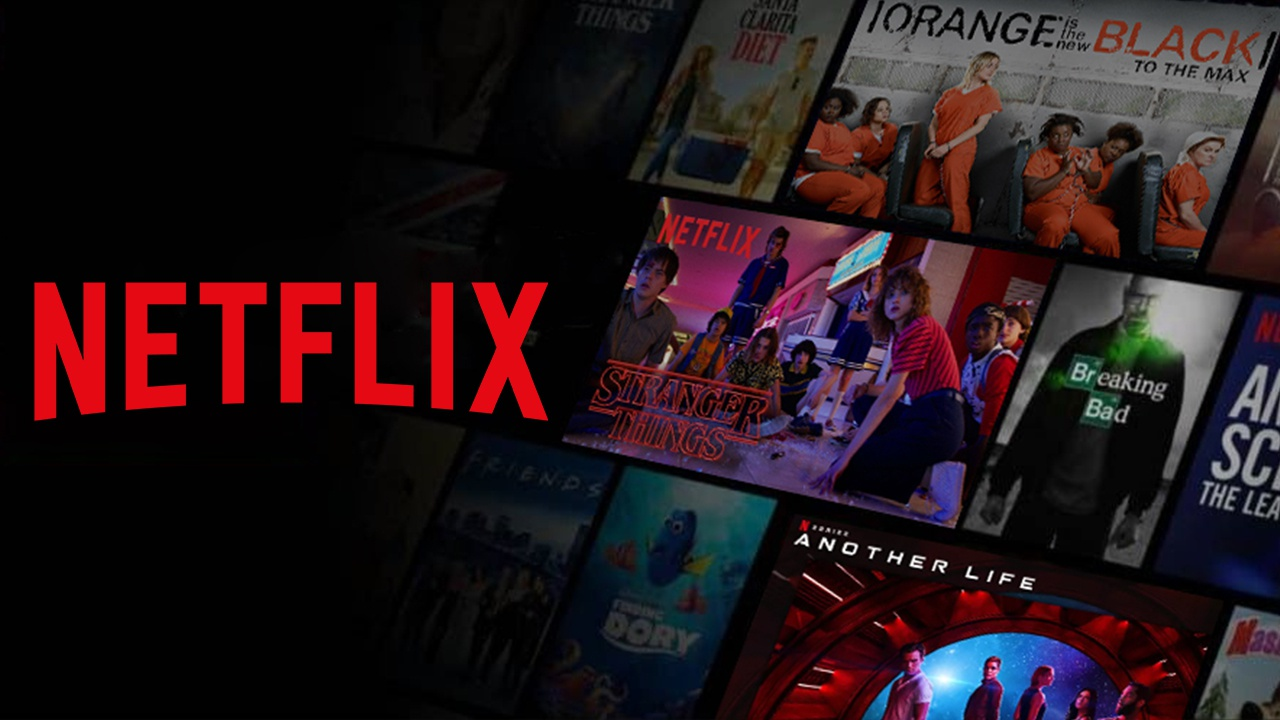

**Problem statement** :  Netflix, with its massive subscriber base and diverse content library, faces the challenge of understanding which type of shows/movies resonate most with their audience in different regions while identifying potential areas for growth. This analysis aims to leverage the provided dataset to uncover data-driven insights that can inform Netflix's production and business expansion strategies.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')  #importing all relevant libraries

In [ ]:
netflix=pd.read_csv('netflix.csv')  #loading the dataset

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.shape

(8807, 12)

There are total 8807 rows and 12 columns

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

The columns show_id and title has all unique values

In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


We have only one numerical column and it gives us the idea of release year of content

In [ ]:
netflix.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
netflix['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
netflix[netflix['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
ind = netflix[netflix['duration'].isna()].index

In [ ]:
netflix.loc[ind] = netflix.loc[ind].fillna(method = 'ffill' , axis = 1)

In [ ]:
netflix.loc[ind ,'rating'] = 'Unknown rating'

In [ ]:
netflix.loc[ind]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,Unknown rating,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,Unknown rating,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,Unknown rating,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

There are missing values in director,cast, country,date added, duration and rating

Filling the director, cast and country column with unknown director, unknown cast and unknown country respectively
Rating column with 'Not available'
and with Date added column decided to drop the null values as there are only 10 of them

In [ ]:
netflix['director']=netflix['director'].fillna('Unknown director')
netflix['cast']=netflix['cast'].fillna('Unknown cast')
netflix['country']=netflix['country'].fillna('Unknown country')
netflix['rating']=netflix['rating'].fillna('Unknown rating')


In [ ]:
netflix.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
netflix = netflix.dropna(subset=['date_added'])  #dropping the NAN rows

In [ ]:
netflix['rating'].value_counts()

TV-MA             3205
TV-14             2157
TV-PG              861
R                  799
PG-13              490
TV-Y7              333
TV-Y               306
PG                 287
TV-G               220
NR                  79
G                   41
Unknown rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: rating, dtype: int64

In [ ]:
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   object
 8   rating        8797 non-null   object
 9   duration      8797 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: object(12)
memory usage: 893.4+ KB


**covert the date_added from object to datetime and creating 4 new columns year, monthname , week num and day**

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month
netflix['day'] = netflix['date_added'].dt.day_name()
netflix['week_added'] = netflix['date_added'].dt.isocalendar().week

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday,38
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday,38
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday,38
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Friday,38


In [ ]:
netflix.columns  #names of all the columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day', 'week_added'],
      dtype='object')

Unnesting the columns

In [ ]:
import copy

df = copy.deepcopy(netflix)               #creating a deepcopy


df["director"] = netflix["director"].str.split(", ")
df["cast"] = netflix["cast"].str.split(", ")
df["country"] = netflix["country"].str.split(", ")
df['listed_in']=netflix['listed_in'].str.split(", ")


In [ ]:
df=df.explode(['listed_in'])

In [ ]:
df = df.explode(['director'])
df = df.explode(['cast'])
df = df.explode(['country'])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday,38
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,38
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,Friday,38


In [ ]:

 df.shape  #unnested data shape

(201833, 16)

In [ ]:

df.info()  #unnested data info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201833 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201833 non-null  object        
 1   type          201833 non-null  object        
 2   title         201833 non-null  object        
 3   director      201833 non-null  object        
 4   cast          201833 non-null  object        
 5   country       201833 non-null  object        
 6   date_added    201833 non-null  datetime64[ns]
 7   release_year  201833 non-null  object        
 8   rating        201833 non-null  object        
 9   duration      201833 non-null  object        
 10  listed_in     201833 non-null  object        
 11  description   201833 non-null  object        
 12  year_added    201833 non-null  int64         
 13  month_added   201833 non-null  int64         
 14  day           201833 non-null  object        
 15  week_added    20183

The columns director, cast, country, rating, listed_in are all categorical variable and we convert them to category datatype

In [ ]:
df['director']=df['director'].astype('category')
df['cast']=df['cast'].astype('category')
df['country']=df['country'].astype('category')
df['rating']=df['rating'].astype('category')
df['listed_in']=df['listed_in'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201833 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201833 non-null  object        
 1   type          201833 non-null  object        
 2   title         201833 non-null  object        
 3   director      201833 non-null  category      
 4   cast          201833 non-null  category      
 5   country       201833 non-null  category      
 6   date_added    201833 non-null  datetime64[ns]
 7   release_year  201833 non-null  object        
 8   rating        201833 non-null  category      
 9   duration      201833 non-null  object        
 10  listed_in     201833 non-null  category      
 11  description   201833 non-null  object        
 12  year_added    201833 non-null  int64         
 13  month_added   201833 non-null  int64         
 14  day           201833 non-null  object        
 15  week_added    20183

3. **Non-Graphical Analysis: Value counts and unique attributes**

In [ ]:
netflix['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

Two types of content is available in netflix . Movies and TVshows

In [ ]:
movies=netflix[netflix['type']=='Movie']
tv_shows=netflix[netflix['type']=='TV Show']

In [ ]:
movies['duration'].value_counts()

90 min     152
94 min     146
97 min     146
93 min     146
91 min     144
          ... 
208 min      1
5 min        1
16 min       1
186 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

In [ ]:
tv_shows['duration'].value_counts()

1 Season      1793
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
13 Seasons       2
15 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

We noticed that the duration format for movies and tvshows are different. To address this we change format for movies to minutes and for tv shows to seasons


In [ ]:
movies['duration']=movies["duration"].str.split(" ",expand=True)[0]


In [ ]:
tv_shows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day,week_added
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday,38
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday,38


In [ ]:
tv_shows['duration']=tv_shows['duration'].str.split(" ",expand=True)[0]

In [ ]:
movies.rename({'duration':'duration in mins'},axis=1,inplace=True)
tv_shows.rename({'duration':'duration in seasons'},axis=1,inplace=True)

In [ ]:
tv_shows.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration in seasons,listed_in,description,year_added,month_added,day,week_added
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday,38
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday,38
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Friday,38
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown country,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,Friday,38


oldest movie/TV show added in netflix in which year

In [ ]:
netflix.release_year.min(), netflix.release_year.max()


(1925, 2021)

oldest and newest movie released in netflix in which year

In [ ]:
movies.release_year.min(), movies.release_year.max()

(1942, 2021)

oldest and newest TV show released in netflix in which year

In [ ]:
tv_shows.release_year.min(), tv_shows.release_year.max()

(1925, 2021)

For Each type , the different ratings and the count of it


In [ ]:


netflix.groupby(['type' , 'rating'])['show_id'].count()

type     rating        
Movie    G                   41
         NC-17                3
         NR                  75
         PG                 287
         PG-13              490
         R                  797
         TV-14             1427
         TV-G               126
         TV-MA             2062
         TV-PG              540
         TV-Y               131
         TV-Y7              139
         TV-Y7-FV             5
         UR                   3
         Unknown rating       5
TV Show  NR                   4
         R                    2
         TV-14              730
         TV-G                94
         TV-MA             1143
         TV-PG              321
         TV-Y               175
         TV-Y7              194
         TV-Y7-FV             1
         Unknown rating       2
Name: show_id, dtype: int64

In [ ]:
movies.shape

(6131, 16)

In [ ]:
tv_shows.shape

(2666, 16)

In [ ]:
df['country'].nunique()


128

The content in netflix is from 128 different countries

In [ ]:
df['country'].unique()

array(['United States', 'South Africa', 'Unknown country', 'India',
       'Ghana', 'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'United Kingdom,', 'Kenya',
       'Chile', 'Luxembourg', 'Cambodia', 'Bangladesh', 'Portugal',
       'Cayman Islands', 'Sene

In [ ]:
df.groupby('country')['title'].nunique().sort_values(ascending=False)[:11].reset_index()

,country,title
0,United States,3683
1,India,1046
2,Unknown country,830
3,United Kingdom,803
4,Canada,445
5,France,393
6,Japan,317
7,Spain,232
8,South Korea,231
9,Germany,226


Most  of content is from USA , followed by India and UK

In [ ]:
df.groupby('director')['title'].nunique().sort_values(ascending=False)[1:10].reset_index()

,director,title
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12


The director with most number of movies/tv series is Rajiv Chilaka

In [ ]:
netflix['director'].value_counts()

Unknown director                  2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64

In [ ]:
df['director'].nunique()

4994

There are total 4993 unique directors in the dataset. (Ignored unknown director)


In [ ]:
df.listed_in.nunique()

42

There are 42 different genres

In [ ]:
df.cast.nunique() #total number of actors on netflix

36404

In [ ]:
df.groupby('cast')['title'].nunique().sort_values(ascending=False)[1:11].reset_index()

,cast,title
0,Anupam Kher,43
1,Shah Rukh Khan,35
2,Julie Tejwani,33
3,Naseeruddin Shah,32
4,Takahiro Sakurai,32
5,Rupa Bhimani,31
6,Akshay Kumar,30
7,Om Puri,30
8,Yuki Kaji,29
9,Amitabh Bachchan,28



 Visual Analysis - Univariate & Bivariate**



 Distribution of content across the different types

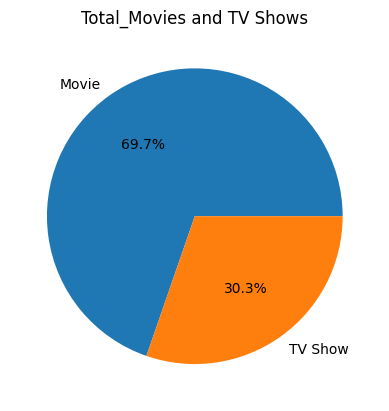

In [ ]:
types = netflix.type.value_counts()
plt.pie(types,  labels=types.index,autopct='%1.1f%%')
plt.title('Total_Movies and TV Shows')
plt.show()

It is observed around 70 % content is Movies and 30 percent content is TV shows

How has the number of movies and tvshows added in netflix has changed over the years

In [ ]:
d = netflix.groupby(['year_added' ,'type' ])['show_id'].count().reset_index()
d


,year_added,type,show_id
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


In [ ]:
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)

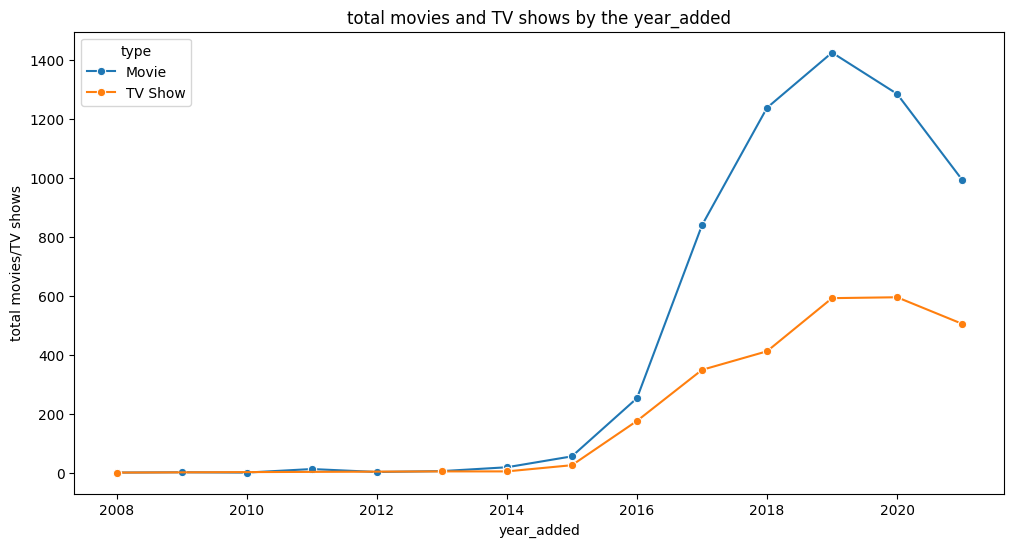

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'year_added' , y = 'total movies/TV shows' , hue = 'type',marker='o')
plt.xlabel('year_added' )
plt.ylabel('total movies/TV shows')
plt.title('total movies and TV shows by the year_added' )
plt.show()

Observation:




*   Netflix ramped up adding the content after 2015.
*  In 2019, most number of movies/Tv shows were added in Netflix.
After that we have seen a decline in adding the content possibly due to pandameic













How has the number of movies released per year changed over time

In [ ]:
netflix.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day,week_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,Saturday,38
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,Friday,38
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,Friday,38
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,Friday,38
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,Friday,38


In [ ]:
d = netflix.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,379
116,TV Show,2019,397
117,TV Show,2020,436


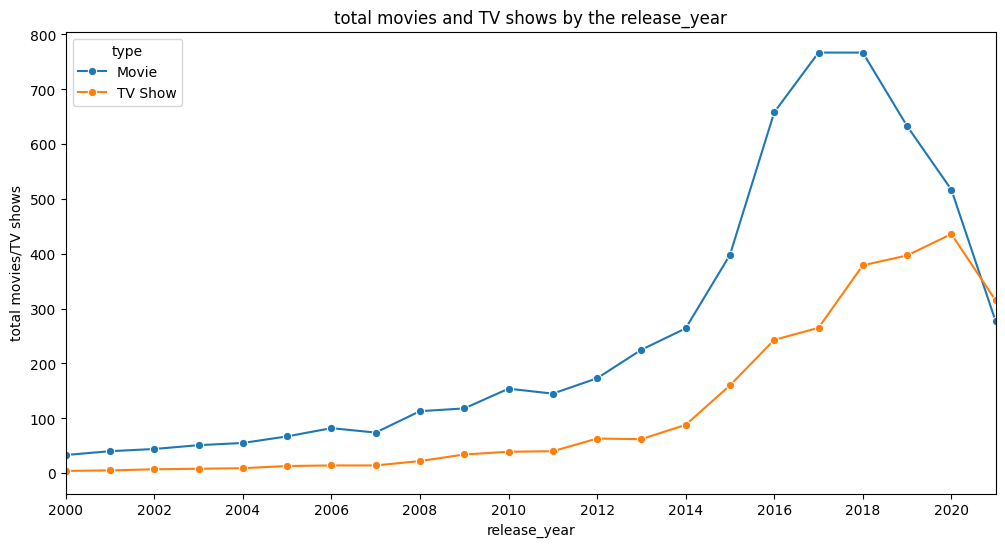

In [ ]:
plt.figure(figsize = (12,6))
sns.lineplot(data = d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o' )
plt.xlabel('release_year' )
plt.ylabel('total movies/TV shows' )
plt.title('total movies and TV shows by the release_year')
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()

2018 marks highest number of movies and tv series released
In recent years, TV shows are more focussed than movies
the number of movies released sky rocketed after 2015



Total content distribution by release year of the content

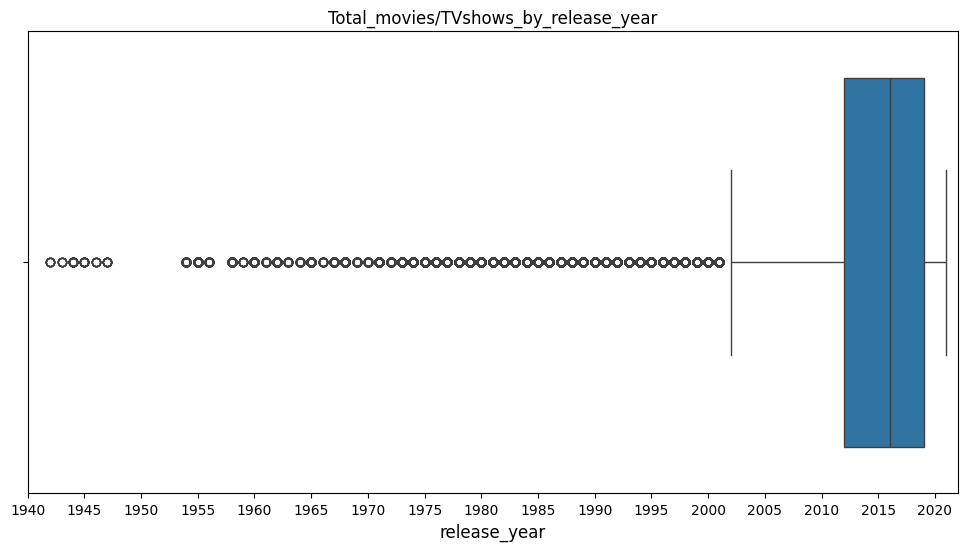

In [ ]:
plt.figure(figsize= (12,6))
sns.boxplot(data = df , x = 'release_year')
plt.xlabel('release_year' , fontsize = 12)
plt.title('Total_movies/TVshows_by_release_year')
plt.xticks(np.arange(1940 , 2021 , 5))
plt.xlim((1940 , 2022))
plt.show()

Netflix has released majority of the content from year 2000 to 2020


In [ ]:
d_cnt = df.groupby('director')['title'].nunique().sort_values(ascending  = False)[1:11].reset_index()
d_cnt

,director,title
0,Rajiv Chilaka,22
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Suhas Kadav,16
5,Jay Karas,15
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Martin Scorsese,12
9,Youssef Chahine,12


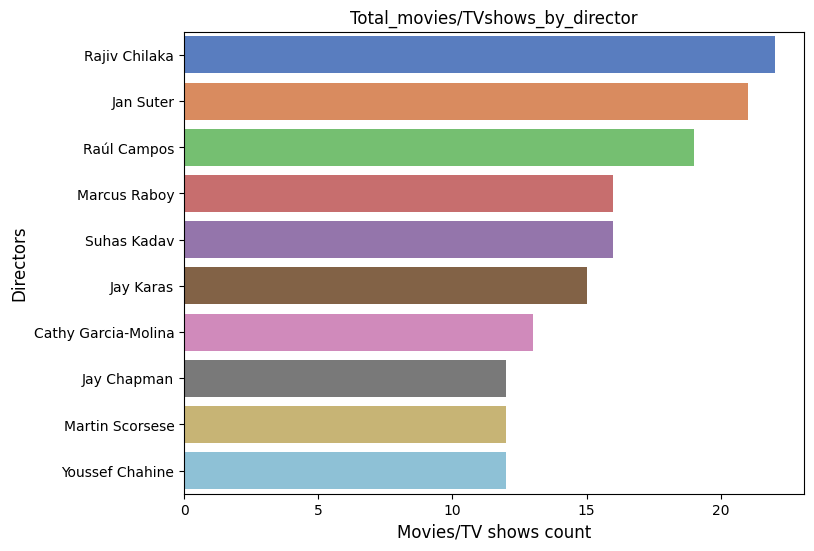

In [ ]:
plt.figure(figsize= (8 , 6))
sns.barplot(data = d_cnt , y = 'director' , x='title',  palette="muted")
plt.xlabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('Movies/TV shows count')
plt.ylabel('Directors' , fontsize = 12)
plt.title('Total_movies/TVshows_by_director')
plt.show()

Observation:


*   The top 3 directors in Netflix, interms of movies directed by them are Rajiv chilaka, Jan Suter and Raul Campos






**Total movies and TV shows by each country**

In [ ]:
c_cnt = df.groupby(['country','type'])['show_id'].nunique().sort_values(ascending  = False).reset_index()

In [ ]:

c_cnt

,country,type,show_id
0,United States,Movie,2751
1,India,Movie,962
2,United States,TV Show,932
3,United Kingdom,Movie,532
4,Unknown country,Movie,440
...,...,...,...
251,Serbia,TV Show,0
252,Iran,TV Show,0
253,Iraq,TV Show,0
254,Jamaica,TV Show,0


In [ ]:
country_tb=df[['show_id','type','country']]

In [ ]:
country_tb['country'].nunique()

128

In [ ]:
top_10_country = df.country.value_counts().head(10).index
top_10_country

Index(['United States', 'India', 'United Kingdom', 'Unknown country', 'Japan',
       'France', 'Canada', 'Spain', 'South Korea', 'Germany'],
      dtype='object')

In [ ]:

c_cnt.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)[:10]



type,Movie,TV Show
country,,
United States,2751.0,932.0
India,962.0,84.0
United Kingdom,532.0,271.0
Unknown country,440.0,390.0
Canada,319.0,126.0
France,303.0,90.0
Germany,182.0,44.0
Spain,171.0,61.0
Japan,119.0,198.0


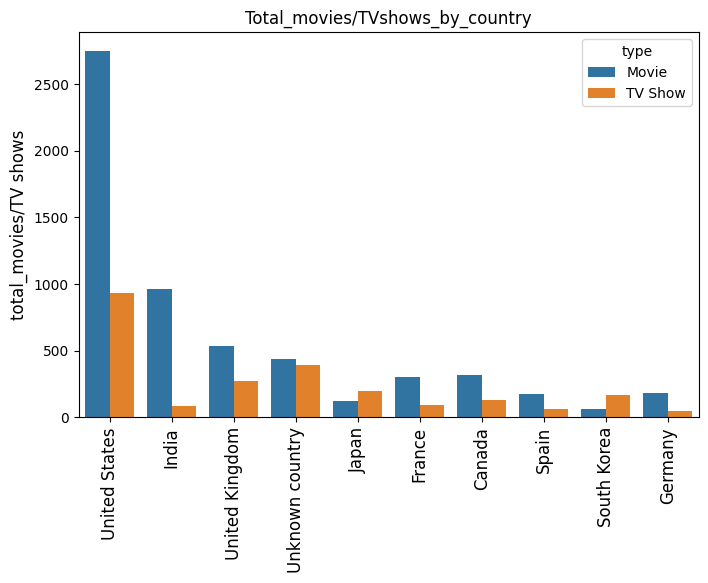

In [ ]:
plt.figure(figsize= (8,5))
sns.barplot(data = c_cnt , x = 'country' ,y='show_id', order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

In [ ]:
country_tb = df[['show_id' , 'type' , 'country']]
country_tb['other'] = country_tb['country'].apply(lambda x : x if x in top_10_country else 'Other Countries' )

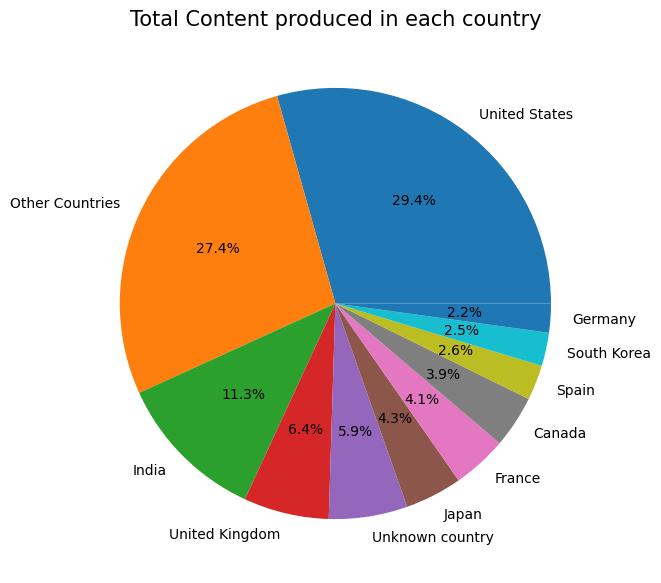

In [ ]:
x = country_tb.other.value_counts()

plt.figure(figsize = (7,7))
plt.pie(x , labels = x.index, autopct='%1.1f%%')
plt.title('Total Content produced in each country' , fontsize = 15)
plt.show()

United states is th highest contributor on Netflix followed by India and UK.

About 72 percent of the total content is produced by the top 10 countries

**Total movies/TV shows in each Genre**

In [ ]:
genre_tb = df[['show_id' , 'type', 'listed_in']]

In [ ]:
genre_tb.listed_in.unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
genre_tb.listed_in.nunique()

42

In [ ]:
df.merge(genre_tb , on = 'show_id' ).groupby(['type_y'])['listed_in_y'].nunique()

type_y
Movie      20
TV Show    22
Name: listed_in_y, dtype: int64

Movies has 20 genres and TV shows has 22 genres

In [ ]:

Mg=genre_tb[genre_tb['type'] == 'Movie']
Tg=genre_tb[genre_tb['type'] == 'TV Show']
movie_genres =Mg.groupby('listed_in')['show_id'].nunique().sort_values(ascending  = False).reset_index()
tv_shows_genres=Tg.groupby('listed_in')['show_id'].nunique().sort_values(ascending  = False).reset_index()


In [ ]:
top_10_movie_genres=movie_genres[:10]
top_10_movie_genres
top_10_tv_shows_genres=tv_shows_genres[:10]

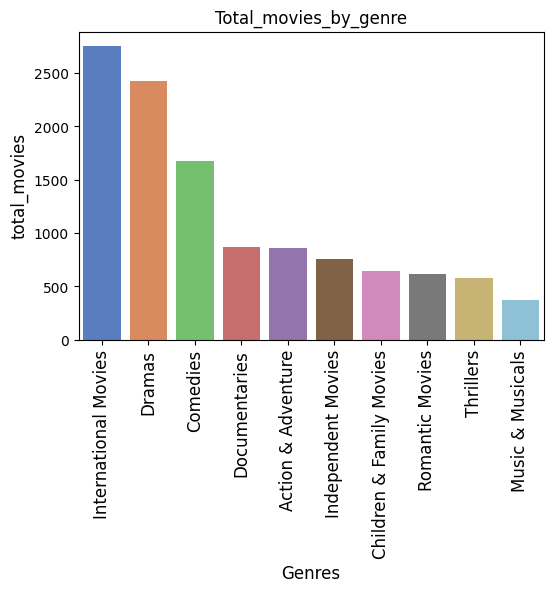

In [ ]:
plt.figure(figsize= (6 , 4))
sns.barplot(data = top_10_movie_genres , x='listed_in', y='show_id',palette="muted")
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_movies_by_genre')
plt.show()

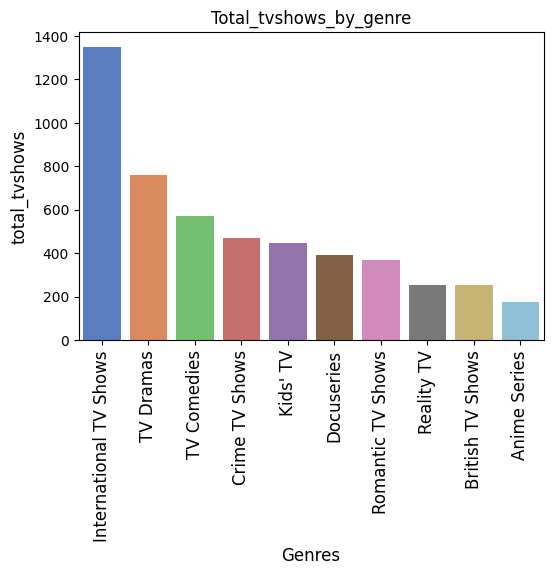

In [ ]:
plt.figure(figsize= (6, 4))
sns.barplot(data = top_10_tv_shows_genres , x='listed_in', y='show_id',palette="muted")
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_tvshows' , fontsize = 12)
plt.xlabel('Genres' , fontsize = 12)
plt.title('Total_tvshows_by_genre')
plt.show()

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

 **Top 5 directors in each Genre**

In [ ]:
x = df[df['director'] != "Unknown director"]

In [ ]:
x=x.groupby([ 'listed_in' , 'director',])['show_id'].nunique().sort_values(ascending  = False).reset_index()
x

,listed_in,director,show_id
0,Children & Family Movies,Rajiv Chilaka,22
1,Stand-Up Comedy,Jan Suter,21
2,Stand-Up Comedy,Raúl Campos,19
3,Children & Family Movies,Suhas Kadav,16
4,Stand-Up Comedy,Marcus Raboy,15
...,...,...,...
12088,Dramas,Debra Granik,1
12089,Dramas,Deep Joshi,1
12090,Dramas,Deepa Mehta,1
12091,Dramas,Deepti Naval,1


In [ ]:
genre_list = [ 'Children & Family Movies', 'Comedies','Dramas', 'International Movies', 'Documentaries' ,
              'International TV Shows', 'Sci-Fi & Fantasy', 'Thrillers', 'Horror Movies']

In [ ]:
top_5_dir = x.loc[x['listed_in'] == 'Action & Adventure'].sort_values('show_id' , ascending = False).head()

In [ ]:
top_5_dir

,listed_in,director,show_id
11,Action & Adventure,Don Michael Paul,9
34,Action & Adventure,Toshiya Shinohara,7
36,Action & Adventure,S.S. Rajamouli,7
33,Action & Adventure,Hidenori Inoue,7
132,Action & Adventure,Johnnie To,5


In [ ]:
for i in genre_list:
    new = x.loc[x['listed_in'] == i].sort_values('show_id' , ascending = False).head()
    top_5_dir = pd.concat([top_5_dir , new])

top_5_dir

,listed_in,director,show_id
11,Action & Adventure,Don Michael Paul,9
34,Action & Adventure,Toshiya Shinohara,7
36,Action & Adventure,S.S. Rajamouli,7
33,Action & Adventure,Hidenori Inoue,7
132,Action & Adventure,Johnnie To,5
0,Children & Family Movies,Rajiv Chilaka,22
3,Children & Family Movies,Suhas Kadav,16
40,Children & Family Movies,Prakash Satam,7
44,Children & Family Movies,Robert Rodriguez,7
48,Children & Family Movies,Robert Vince,6


**Top 5 genres in each country**

In [ ]:
 x=df.groupby(['country' , 'listed_in'])['show_id'].nunique().sort_values(ascending  = False).reset_index()
 x

,country,listed_in,show_id
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,511
...,...,...,...
1459,Mongolia,International Movies,1
1460,Montenegro,Dramas,1
1461,Montenegro,International Movies,1
1462,Morocco,Action & Adventure,1


In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']

In [ ]:
top_5_genre = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

for i in country_list:
    new = x.loc[x['country'] == i].sort_values('show_id' , ascending = False).head(5)
    top_5_genre = pd.concat( [top_5_genre , new] , ignore_index = True)

In [ ]:
top_5_genre

,country,listed_in,show_id
0,United States,Dramas,835
1,United States,Comedies,680
2,United States,Documentaries,511
3,United States,Action & Adventure,404
4,United States,Children & Family Movies,390
5,India,International Movies,864
6,India,Dramas,662
7,India,Comedies,323
8,India,Independent Movies,167
9,India,Action & Adventure,137


**TOP actors for each country**

In [ ]:
x= df[df['cast'] != "Unknown cast"]
x=x.groupby(['country' , 'cast'])['show_id'].nunique().sort_values(ascending  = False).reset_index()
x

,country,cast,show_id
0,India,Anupam Kher,40
1,India,Shah Rukh Khan,34
2,India,Naseeruddin Shah,31
3,India,Akshay Kumar,29
4,India,Om Puri,29
...,...,...,...
54783,Japan,Helena Bonham Carter,1
54784,Japan,Herbie Baez,1
54785,Japan,Hideaki Murata,1
54786,Japan,Hidekazu Mashima,1


In [ ]:
x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)


,country,cast,show_id
13,United States,Samuel L. Jackson,22
14,United States,Tara Strong,22
17,United States,Fred Tatasciore,21
18,United States,Adam Sandler,20
24,United States,Nicolas Cage,19


In [ ]:
country_list = ['India'  , 'United Kingdom' , 'Canada' , 'France' , 'Japan']
top_5_actors = x.loc[x['country'].isin(['United States'])].sort_values('show_id' , ascending = False).head(5)

In [ ]:
top_5_actors

,country,cast,show_id
13,United States,Samuel L. Jackson,22
14,United States,Tara Strong,22
17,United States,Fred Tatasciore,21
18,United States,Adam Sandler,20
24,United States,Nicolas Cage,19


In [ ]:
for i in country_list:
    new = x.loc[x['country'].isin([i])].sort_values('show_id' , ascending = False).head(5)
    top_5_actors = pd.concat( [top_5_actors , new] , ignore_index = True)

In [ ]:
top_5_actors

,country,cast,show_id
0,United States,Samuel L. Jackson,22
1,United States,Tara Strong,22
2,United States,Fred Tatasciore,21
3,United States,Adam Sandler,20
4,United States,Nicolas Cage,19
5,India,Anupam Kher,40
6,India,Shah Rukh Khan,34
7,India,Naseeruddin Shah,31
8,India,Akshay Kumar,29
9,India,Om Puri,29


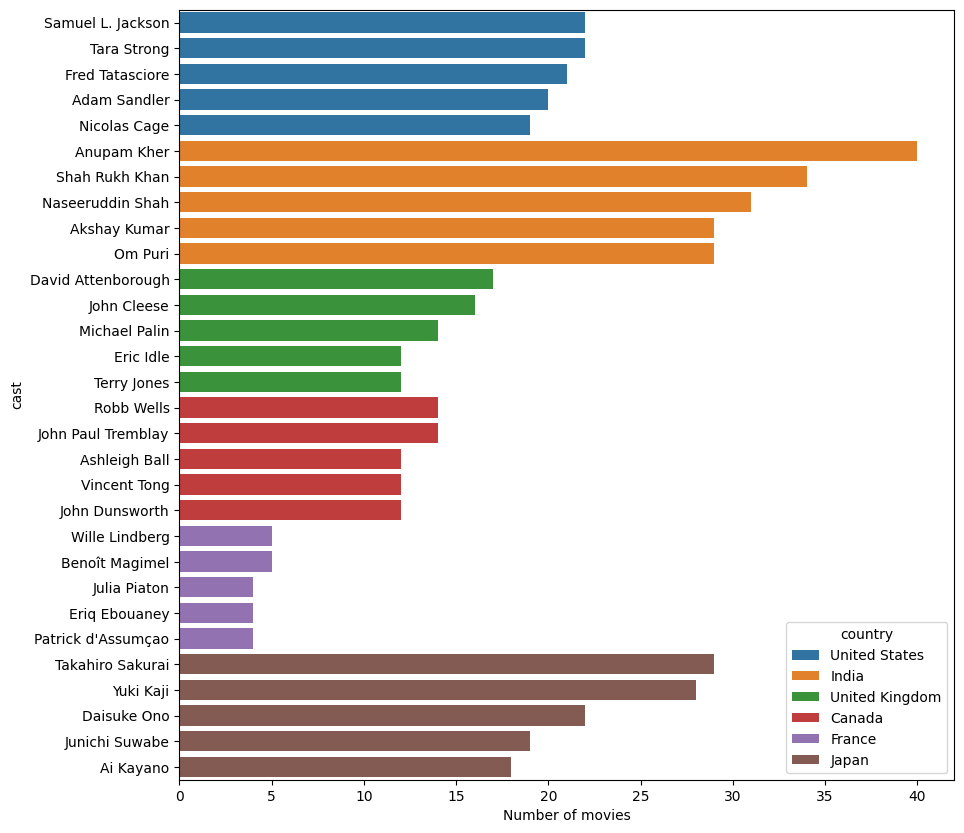

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(data = top_5_actors , y = 'cast' , x = 'show_id' , hue = 'country')
plt.xlabel('Number of movies')
plt.show()

**What is the best time of the year when maximum content get added on the Netflix?**

In [ ]:
month_year

,year_added,month_added,show_id
0,2008,1,1
1,2014,7,1
2,2014,8,1
3,2014,9,1
4,2013,8,1
...,...,...,...
103,2020,1,205
104,2021,6,207
105,2019,12,215
106,2019,11,255


In [ ]:
month_year =df.groupby(['year_added' , 'month_added'])['show_id'].nunique().sort_values().reset_index()

In [ ]:
month_year.sort_values(by=['year_added','month_added'])

,year_added,month_added,show_id
0,2008,1,1
15,2008,2,1
14,2009,5,1
13,2009,11,1
12,2010,11,1
...,...,...,...
75,2021,5,132
104,2021,6,207
107,2021,7,257
97,2021,8,178


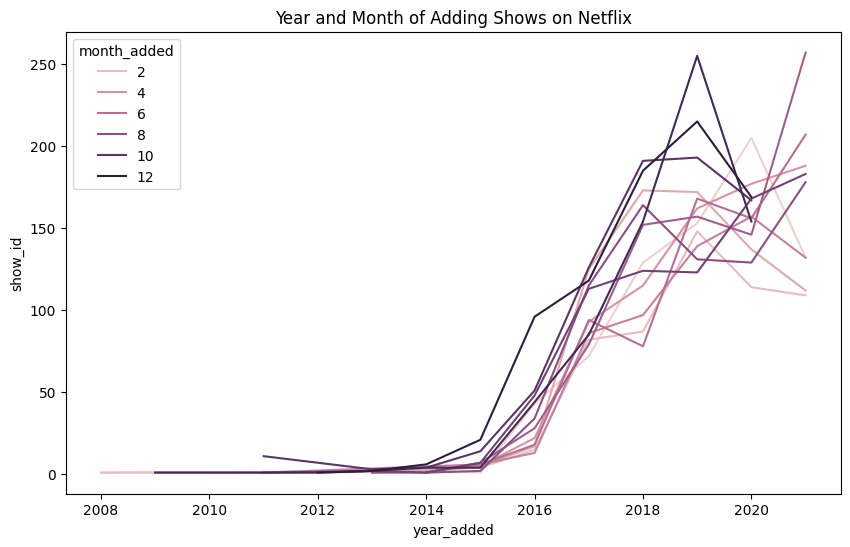

In [ ]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'year_added', y = 'show_id', hue='month_added')
plt.title('Year and Month of Adding Shows on Netflix')
plt.show()

The number of shows being added is increasing with each year until 2019

In [ ]:
 !pip install wordcloud matplotlib
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud



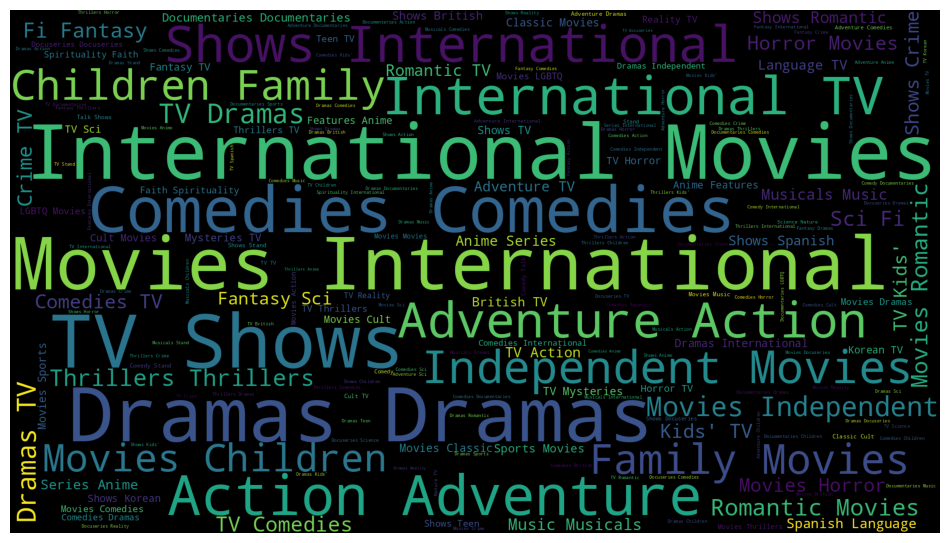

In [ ]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.listed_in))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

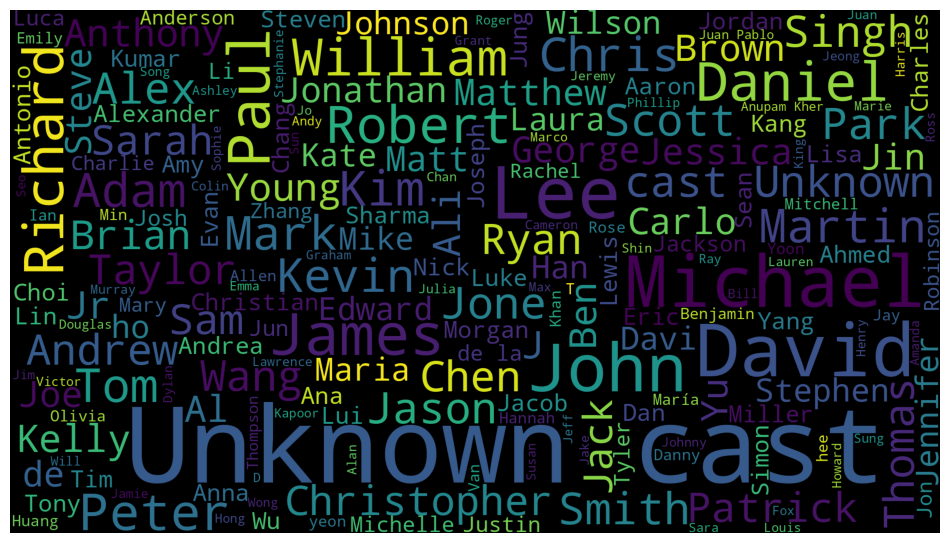

In [ ]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix.cast))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

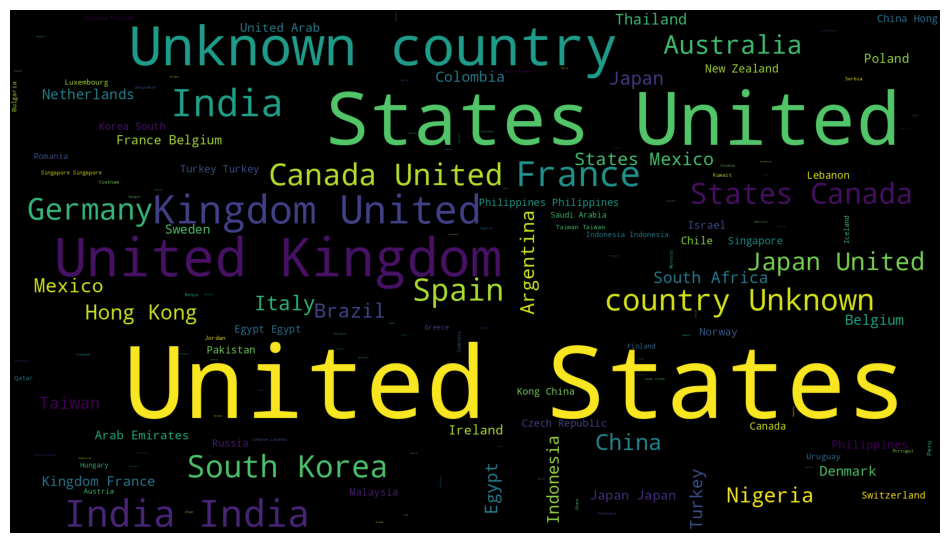

In [ ]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(netflix.country))
plt.imshow(wordcloud)
plt.axis('off')

plt.show()

**After how many days the movie will be added to Netflix after the release of the movie**

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['release_date'] = pd.to_datetime(netflix['release_year'], format='%Y')


In [ ]:
netflix['days_to_add'] = (netflix['date_added'] - netflix['release_date']).dt.days
average_days_to_add = netflix['days_to_add'].mean()
mode_days_to_add = netflix['days_to_add'].mode()[0]
print('The average days of adding a movie after its release on Netflix: ', round(average_days_to_add,0))
print('The mode days of adding a movie after its release on Netflix:', mode_days_to_add)

The average days of adding a movie after its release on Netflix:  1895.0
The mode days of adding a movie after its release on Netflix: 334


In [ ]:
!jupyter nbconvert --to html /content/netflix.ipynb

[NbConvertApp] Converting notebook /content/netflix.ipynb to html
[NbConvertApp] Writing 3252258 bytes to /content/netflix.html


         Insights based on Non-Graphical and Visual Analysis :

    Netflix has around 70 percent of movies content and 30 percent TV shows content, but TV shows surpassed movies in 2020 and growing faster since 2018.
    The content uploaded in Netflix has significantly increased from 2015, peaking in 2019, with a slight drop in 2020-2021 (potentially pandemic-related).
    Netflix has wide range of directors around 4993 of them contributing to its content.
    50 mins - 150 mins is the range of movie durations, excluding potential outliers. 1-3 seasons is the range for TV shows seasons, excluding potential outliers.
    Most ratings except TV-MA have lower availability outside the US.
    Content available in various ratings (TV-Y7, TV-MA, etc.), with TV-MA being the most common.
    International, Dramas, and Comedies are most common genres for both movies and TV shows.
    The US has a wider variety of popular genres compared to other countries.
    Indian actors have the highest number of movie appearances on Netflix.
    Shorter duration movies have been popular in last 10 years.

Recommendations:

    Focus on TV Shows: Invest in producing more TV shows as they are gaining popularity.
    Diversify content: Explore international content and cater to regional preferences.
    Consider shorter movies: Shorter movies may be more appealing to modern audiences.
    Analyze rating availability: Investigate why certain ratings are less available outside the US and address any disparities.
    Expand content library:
        Add classic movies and shows for seniors.
        Include more content for diverse age groups beyond mature audiences and children.
        Feature content from under-represented countries and genres.
        Produce shorter content:
            Focus on movies with durations between 75-150 minutes.
            Create TV shows with 1-3 seasons.

Business Insights:

    Target Audience:
        Limited content for pre-2000 era: The majority of content being post-2000 suggests a focus on younger audiences. Consider adding classic movies and shows to cater to seniors.
        Mature and children's content dominates: 80% of content targets mature audiences (TV-MA, TV-14, R) or children with parental guidance (TV-PG, PG, PG-13). Diversify offerings to cater to other age groups.

    Content :
        Shorter content preferred: Focus on producing movies (75-150 minutes) and TV shows (1-3 seasons) as this aligns with current viewer preferences.
        Maximum content of Netflix which is around 75% , is coming from the top 10 countries. Rest of the world only contributes 25% of the content. More countries can be focussed in future to grow the business.